In [ ]:
import pandas as pd
pd.__version__

'1.1.5'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset: Stanford Open Policing Project

https://openpolicing.stanford.edu/

In [ ]:
ri = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/police/police.csv")


In [ ]:
# what does each row represent?
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
ri.shape

(91741, 15)

In [ ]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [ ]:
ri.stop_date.str.slice(0, 4)

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_date, Length: 91741, dtype: object

In [ ]:
ri['year'] = ri.stop_date.str.slice(0, 4)

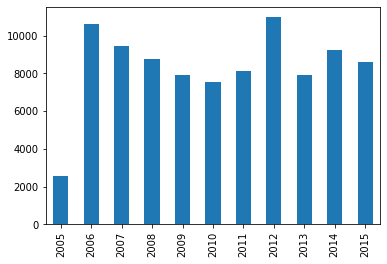

In [ ]:
ri.year.value_counts().sort_index().plot(kind='bar')

In [ ]:
ri.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop', 'year'],
      dtype='object')

In [ ]:
# what do these numbers mean?
ri.shape

(91741, 16)

In [ ]:
ri.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [ ]:
# what do these types mean?
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
year                   object
dtype: object

- What does NaN mean?
- Why might a value be missing?
- Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?

In [ ]:
# what are these counts? how does this work?
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
year                      0
dtype: int64

In [ ]:
(True == 1) and (False == 0)

True

## 1. Remove the column that only contains missing values


In [ ]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
year                      0
dtype: int64

In [ ]:
ri.drop(columns=['county_name'], axis=1, inplace=True)

In [ ]:
# output shape after removing
ri.shape

(91741, 15)

In [ ]:
# columns after removing
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'year'],
      dtype='object')

Lessons:

- Pay attention to default arguments
- Check your work
- There is more than one way to do everything in pandas

## 2. Do men or women speed more often? 

In [ ]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'year'],
      dtype='object')

In [ ]:
ri[ri.driver_gender=='M'].violation_raw.value_counts(normalize=True)

Speeding                            0.524350
Other Traffic Violation             0.207012
Equipment/Inspection Violation      0.135671
Registration Violation              0.038461
Special Detail/Directed Patrol      0.037332
Seatbelt Violation                  0.036839
Call for Service                    0.013705
Violation of City/Town Ordinance    0.002623
Motorist Assist/Courtesy            0.002258
APB                                 0.000922
Suspicious Person                   0.000652
Warrant                             0.000175
Name: violation_raw, dtype: float64

In [ ]:
ri[ri.driver_gender=='F'].violation_raw.value_counts(normalize=True)

Speeding                            0.658500
Other Traffic Violation             0.136277
Equipment/Inspection Violation      0.105780
Registration Violation              0.043086
Seatbelt Violation                  0.027009
Call for Service                    0.018545
Special Detail/Directed Patrol      0.004551
Motorist Assist/Courtesy            0.002595
Violation of City/Town Ordinance    0.001957
APB                                 0.000893
Suspicious Person                   0.000638
Warrant                             0.000170
Name: violation_raw, dtype: float64

In [ ]:
ri.groupby(ri.driver_gender).violation_raw.value_counts(normalize=True)

driver_gender  violation_raw                   
F              Speeding                            0.658500
               Other Traffic Violation             0.136277
               Equipment/Inspection Violation      0.105780
               Registration Violation              0.043086
               Seatbelt Violation                  0.027009
               Call for Service                    0.018545
               Special Detail/Directed Patrol      0.004551
               Motorist Assist/Courtesy            0.002595
               Violation of City/Town Ordinance    0.001957
               APB                                 0.000893
               Suspicious Person                   0.000638
               Warrant                             0.000170
M              Speeding                            0.524350
               Other Traffic Violation             0.207012
               Equipment/Inspection Violation      0.135671
               Registration Violation              0

What are some relevant facts that we don't know?

Lessons:

- There is more than one way to understand a question

## 3. Does gender affect who gets searched during a stop? 

In [ ]:
ri.search_conducted.unique()

array([False,  True])

In [ ]:
ri[ri.driver_gender=='M'].search_conducted.value_counts(normalize=True)

False    0.956674
True     0.043326
Name: search_conducted, dtype: float64

In [ ]:
ri[ri.driver_gender=='F'].search_conducted.value_counts(normalize=True)

False    0.979967
True     0.020033
Name: search_conducted, dtype: float64

Does this prove that gender affects who gets searched?

In [ ]:
# YES

Does this prove causation?

Lessons:

- Causation is difficult to conclude, so focus on relationships
- Include all relevant factors when studying a relationship

## 4. Why is search_type missing so often?

In [ ]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [ ]:
ri.search_type.isnull().value_counts()

True     88545
False     3196
Name: search_type, dtype: int64

In [ ]:
# Its missing because for 88545 times search didnt happend. 

Lessons:

- Verify your assumptions about your data
- pandas functions ignore missing values by default

## 5. During a search, how often is the driver frisked?

Lessons:

- Use string methods to find partial matches
- Use the correct denominator when calculating rates
- pandas calculations ignore missing values
- Apply the "smell test" to your results

In [ ]:
ri[ri.search_conducted==True].search_type.unique()

array(['Incident to Arrest,Protective Frisk', 'Probable Cause',
       'Incident to Arrest', 'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Reasonable Suspicion', 'Inventory', 'Inventory,Protective Frisk',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Inventory,Probable Cause',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Probable Cause,Protective Frisk',
       'Inventory,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable Cause,Reasonable Suspicion',
    

In [ ]:
ri[ri.search_conducted==True].search_type.str.contains('Frisk').value_counts()

False    2922
True      274
Name: search_type, dtype: int64

## 6. Which year had the least number of stops? 

In [ ]:
ri.stop_date = pd.to_datetime(ri.stop_date)


In [ ]:
ri

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,2015
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,2015
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,2015
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2015


In [ ]:
ri['year'] = ri.stop_date.dt.year

In [ ]:
ri.agg({'year':['min']})

,year
min,2005


Lessons:

- Consider removing chunks of data that may be biased
- Use the datetime data type for dates and times

## 7. How does drug activity change by time of day?

In [ ]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'year'],
      dtype='object')

In [ ]:
ri.stop_time = pd.to_datetime(ri.stop_time)

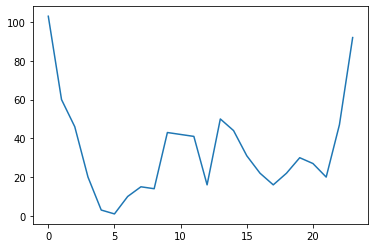

In [ ]:
ri[ri.drugs_related_stop==True].stop_time.dt.hour.value_counts().sort_index().plot()

Lessons:

- Use plots to help you understand trends
- Create exploratory plots using pandas one-liners

## 8. Do most stops occur at night?

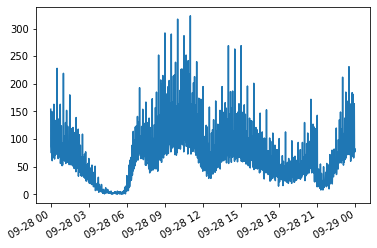

In [ ]:
ri.stop_time.value_counts().sort_index().plot()

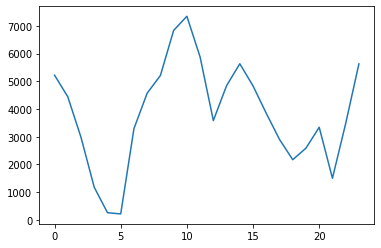

In [ ]:
ri.stop_time.dt.hour.value_counts().sort_index().plot()

Lessons:

- Be conscious of sorting when plotting

## 9. Find the bad data in the stop_duration column and fix it 

In [ ]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [ ]:
ri.stop_duration.isnull().sum()

5333

In [ ]:
ri[(ri.stop_duration=='1') | (ri.stop_duration=='2')].stop_duration = None

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
ri.loc[(ri.stop_duration=='1') | (ri.stop_duration=='2'), 'stop_duration'] = None

In [ ]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [ ]:
ri.stop_duration.isnull().sum()

5335

Lessons:

- Ambiguous data should be marked as missing
- Don't ignore the SettingWithCopyWarning
- NaN is not a string

## 10. What is the mean stop_duration for each violation_raw?

In [ ]:
stop_duration_replace_dict = {
    "0-15 Min" : 8,
    "16-30 Min" : 23,
    "30+ Min" : 31
}

In [ ]:
ri.stop_duration.replace(stop_duration_replace_dict, inplace=True)

In [ ]:
vr_grp = ri.groupby("violation_raw")


In [ ]:
vr_grp.stop_duration.value_counts()

violation_raw                     stop_duration
APB                               8.0                 37
                                  23.0                24
                                  31.0                18
Call for Service                  8.0                547
                                  23.0               435
                                  31.0               316
Equipment/Inspection Violation    8.0               9173
                                  23.0              1373
                                  31.0               474
Motorist Assist/Courtesy          8.0                119
                                  23.0                59
                                  31.0                25
Other Traffic Violation           8.0              11763
                                  23.0              3150
                                  31.0              1310
Registration Violation            8.0               2421
                                  23.0  

In [ ]:
vr_grp.stop_duration.mean()

violation_raw
APB                                 17.797468
Call for Service                    18.626348
Equipment/Inspection Violation      10.858167
Motorist Assist/Courtesy            15.192118
Other Traffic Violation             12.769771
Registration Violation              12.901224
Seatbelt Violation                   9.561314
Special Detail/Directed Patrol      13.806517
Speeding                            10.404358
Suspicious Person                   16.000000
Violation of City/Town Ordinance    12.990521
Warrant                             18.600000
Name: stop_duration, dtype: float64

Lessons:

- Convert strings to numbers for analysis
- Approximate when necessary
- Use count with mean to looking for meaningless means

## 11. Plot the results of the first groupby from the previous exercise

Lessons:

- Don't use a line plot to compare categories
- Be conscious of sorting and orientation when plotting

## 12. Compare the age distributions for each violation

In [ ]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'year'],
      dtype='object')

In [ ]:
ri.driver_age.isnull().sum()

5621

In [ ]:
ri.driver_age_raw.isnull().sum()

5327

In [ ]:
ri.driver_age_raw.unique()

array([1985., 1965., 1972., 1986., 1984., 1982., 1969., 1970., 1979.,
       1966., 1955., 1958., 1953., 1967.,   nan, 1964., 1977., 1959.,
       1973., 1947., 1978., 1962., 1981., 1988., 1983., 1961., 1957.,
       1971., 1950., 1954., 1960., 1976., 1974., 1968., 1938., 1980.,
       1963., 1975., 1987., 1948., 1956., 1944., 1935.,    0., 1952.,
       1945., 1946., 1941., 1942., 1951., 1949., 2005., 1939., 1943.,
       1936., 1924., 1937., 1929., 1930., 1931., 1923., 1940., 1933.,
       1989., 1928., 1932., 1990., 1926., 2006., 1927., 1997., 1934.,
       1887., 1925., 1918., 2004., 1991., 2002., 2007., 1992., 8801.,
       2001., 2003., 1998., 1922., 1993., 2008., 2009., 2919., 2000.,
       1994., 1995., 2011., 1996., 2013., 1914., 1920., 1999.])

In [ ]:
ri[(ri.driver_age.isnull()) & (ri.driver_age_raw.notnull()) & (ri.driver_age_raw != 0.0) & (ri.driver_age_raw != 8801.0) & (ri.driver_age_raw != 2919.0)].shape

(35, 15)

In [ ]:
mask = (ri.driver_age.isnull()) & (ri.driver_age_raw.notnull()) & (ri.driver_age_raw != 0.0) & (ri.driver_age_raw != 8801.0) & (ri.driver_age_raw != 2919.0)

In [ ]:
mask.value_counts()

False    91706
True        35
dtype: int64

In [ ]:
driver_age_fix_df = ri[mask].copy()

In [ ]:
driver_age_fix_df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
414,2005-10-17,08:32,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,8.0,False,2005
3758,2006-02-06,13:20,M,2006.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
5200,2006-03-29,19:37,F,1997.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
6016,2006-04-26,09:15,F,2006.0,NaN,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,8.0,False,2006
7397,2006-06-12,23:55,F,1887.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
8373,2006-07-17,08:20,F,2006.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
8656,2006-07-27,19:08,M,2006.0,NaN,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,8.0,False,2006
9059,2006-08-09,09:10,M,2006.0,NaN,Black,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
9359,2006-08-22,06:30,F,2006.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
10023,2006-09-12,17:40,M,2006.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006


In [ ]:
driver_age_fix_df["driver_age"] = driver_age_fix_df["year"] - driver_age_fix_df["driver_age_raw"]

In [ ]:
driver_age_fix_df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
414,2005-10-17,08:32,M,2005.0,0.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,8.0,False,2005
3758,2006-02-06,13:20,M,2006.0,0.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
5200,2006-03-29,19:37,F,1997.0,9.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
6016,2006-04-26,09:15,F,2006.0,0.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,8.0,False,2006
7397,2006-06-12,23:55,F,1887.0,119.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
8373,2006-07-17,08:20,F,2006.0,0.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
8656,2006-07-27,19:08,M,2006.0,0.0,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,8.0,False,2006
9059,2006-08-09,09:10,M,2006.0,0.0,Black,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
9359,2006-08-22,06:30,F,2006.0,0.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006
10023,2006-09-12,17:40,M,2006.0,0.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,2006


In [ ]:
ri[mask] = driver_age_fix_df

In [ ]:
ri.driver_age_raw.isnull().sum()

5327

In [ ]:
ri["driver_age"].unique()

array([ 20.,  40.,  33.,  19.,  21.,  23.,  36.,  35.,  26.,  39.,  50.,
        47.,  52.,  38.,  nan,  41.,  28.,  46.,  32.,  58.,  27.,  43.,
        24.,  17.,  22.,  44.,  48.,  34.,  55.,  51.,  45.,  29.,  31.,
        37.,  67.,  25.,  42.,  30.,  18.,  57.,  49.,  61.,  70.,  53.,
        60.,  59.,  64.,  63.,  54.,  56.,   0.,  66.,  62.,  69.,  81.,
        68.,  76.,  75.,  74.,  82.,  65.,  72.,  16.,  77.,  73.,  71.,
        80.,  79.,   9., 119.,  78.,  88.,   2.,  15.,   4.,  83.,   6.,
         1.,  10.,  86.,   3.,  11.,  84.,   5.,  14.,  85.,  87.,  99.,
        89.,  94.,  90.])

In [ ]:
ri[[ "violation", "driver_age"]].groupby("violation").driver_age.value_counts()

violation  driver_age
Equipment  23.0          664
           21.0          623
           22.0          601
           24.0          572
           20.0          540
                        ... 
Speeding   10.0            1
           11.0            1
           15.0            1
           90.0            1
           119.0           1
Name: driver_age, Length: 421, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

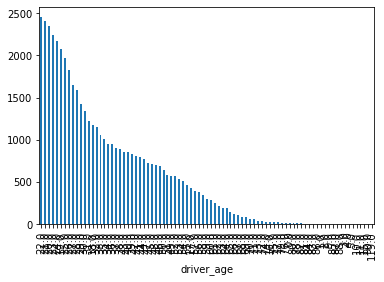

In [ ]:
ri[[ "violation", "driver_age"]].groupby("violation").driver_age.value_counts()["Speeding"].plot.bar()

In [ ]:
# ri.groupby("violation").driver_age.unique().loc[]

In [ ]:
ri.groupby('violation').driver_age.value_counts().unstack()

driver_age,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,94.0,99.0
violation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Equipment,NaN,5.0,56.0,200.0,457.0,540.0,623.0,601.0,664.0,572.0,537.0,529.0,446.0,364.0,353.0,325.0,329.0,306.0,280.0,239.0,256.0,191.0,202.0,194.0,165.0,181.0,169.0,181.0,180.0,142.0,141.0,146.0,129.0,126.0,116.0,114.0,114.0,102.0,93.0,83.0,50.0,76.0,71.0,42.0,61.0,50.0,38.0,29.0,22.0,13.0,14.0,23.0,13.0,6.0,7.0,8.0,1.0,6.0,4.0,2.0,5.0,4.0,2.0,2.0,1.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Moving violation,4.0,7.0,77.0,231.0,447.0,554.0,634.0,630.0,666.0,597.0,583.0,534.0,538.0,477.0,471.0,461.0,384.0,412.0,379.0,371.0,339.0,324.0,310.0,327.0,353.0,323.0,328.0,332.0,333.0,325.0,305.0,317.0,282.0,299.0,275.0,284.0,258.0,240.0,226.0,223.0,199.0,170.0,157.0,167.0,149.0,114.0,112.0,89.0,80.0,65.0,72.0,63.0,37.0,38.0,23.0,29.0,19.0,20.0,14.0,15.0,12.0,18.0,6.0,8.0,5.0,5.0,4.0,1.0,1.0,3.0,3.0,2.0,2.0,NaN,NaN,NaN,1.0,1.0
Other,NaN,2.0,10.0,34.0,78.0,94.0,97.0,117.0,90.0,112.0,123.0,123.0,113.0,92.0,88.0,99.0,82.0,100.0,87.0,101.0,107.0,98.0,85.0,83.0,100.0,112.0,97.0,103.0,100.0,111.0,116.0,107.0,85.0,130.0,104.0,106.0,84.0,95.0,79.0,76.0,67.0,62.0,66.0,48.0,57.0,39.0,44.0,28.0,36.0,23.0,23.0,19.0,13.0,13.0,3.0,7.0,7.0,7.0,3.0,4.0,2.0,4.0,2.0,2.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
Registration/plates,NaN,5.0,10.0,48.0,93.0,147.0,144.0,182.0,167.0,164.0,161.0,165.0,150.0,128.0,111.0,96.0,86.0,113.0,75.0,87.0,94.0,76.0,86.0,69.0,70.0,76.0,59.0,60.0,60.0,53.0,67.0,55.0,47.0,35.0,43.0,47.0,49.0,38.0,26.0,30.0,23.0,22.0,14.0,19.0,20.0,15.0,6.0,7.0,9.0,2.0,3.0,4.0,NaN,1.0,3.0,1.0,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat belt,NaN,NaN,8.0,39.0,79.0,105.0,152.0,142.0,157.0,169.0,167.0,161.0,151.0,132.0,98.0,109.0,94.0,102.0,74.0,72.0,65.0,64.0,48.0,42.0,40.0,38.0,43.0,48.0,41.0,36.0,40.0,43.0,29.0,27.0,42.0,29.0,27.0,19.0,30.0,36.0,15.0,20.0,14.0,18.0,18.0,12.0,8.0,4.0,9.0,6.0,6.0,2.0,4.0,1.0,1.0,4.0,5.0,2.0,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Speeding,1.0,26.0,424.0,1181.0,2074.0,2354.0,2412.0,2453.0,2242.0,2168.0,1966.0,1823.0,1650.0,1587.0,1420.0,1346.0,1225.0,1153.0,1061.0,956.0,1007.0,956.0,899.0,886.0,830.0,852.0,800.0,804.0,857.0,778.0,709.0,689.0,729.0,699.0,568.0,642.0,581.0,567.0,533.0,518.0,461.0,381.0,393.0,352.0,301.0,287.0,255.0,212.0,193.0,189.0,140.0,116.0,107.0,89.0,83.0,66.0,62.0,38.0,42.0,27.0,25.0,15.0,23.0,10.0,18.0,11.0,8.0,10.0,4.0,6.0,2.0,4.0,2.0,2.0,NaN,1.0,NaN,NaN


In [ ]:
graph_data = ri.groupby('violation').driver_age.value_counts().unstack()

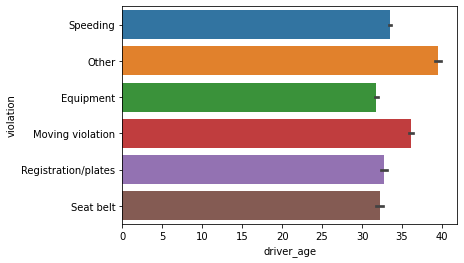

In [ ]:
import seaborn as sns
p = sns.barplot(x='driver_age', y='violation', data=ri)
p

Lessons:

- Use histograms to show distributions
- Be conscious of axes when using grouped plots

## 13. Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [ ]:
ri = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/police/police.csv")


In [ ]:
ri.stop_date = pd.to_datetime(ri.stop_date)
ri['year'] = ri.stop_date.dt.year

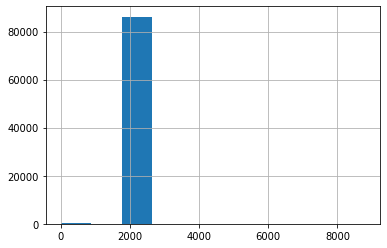

In [ ]:
ri['driver_age_raw'].hist()

In [ ]:
import numpy as np
ri.loc[((ri.driver_age_raw == 8801) | (ri.driver_age_raw==2919) | (ri.driver_age_raw==0))]["driver_age"].unique()
# print()


array([nan])

In [ ]:
ri.loc[((ri.driver_age_raw == 8801) | (ri.driver_age_raw==2919) | (ri.driver_age_raw==0)),"driver_age_raw"] = np.nan

In [ ]:
ri.driver_age_raw.unique()

array([1985., 1965., 1972., 1986., 1984., 1982., 1969., 1970., 1979.,
       1966., 1955., 1958., 1953., 1967.,   nan, 1964., 1977., 1959.,
       1973., 1947., 1978., 1962., 1981., 1988., 1983., 1961., 1957.,
       1971., 1950., 1954., 1960., 1976., 1974., 1968., 1938., 1980.,
       1963., 1975., 1987., 1948., 1956., 1944., 1935., 1952., 1945.,
       1946., 1941., 1942., 1951., 1949., 2005., 1939., 1943., 1936.,
       1924., 1937., 1929., 1930., 1931., 1923., 1940., 1933., 1989.,
       1928., 1932., 1990., 1926., 2006., 1927., 1997., 1934., 1887.,
       1925., 1918., 2004., 1991., 2002., 2007., 1992., 2001., 2003.,
       1998., 1922., 1993., 2008., 2009., 2000., 1994., 1995., 2011.,
       1996., 2013., 1914., 1920., 1999.])

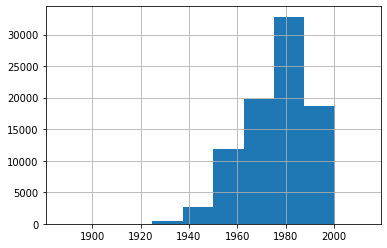

In [ ]:
ri['driver_age_raw'].hist()

In [ ]:
ri.driver_age_raw.unique()

array([1985., 1965., 1972., 1986., 1984., 1982., 1969., 1970., 1979.,
       1966., 1955., 1958., 1953., 1967.,   nan, 1964., 1977., 1959.,
       1973., 1947., 1978., 1962., 1981., 1988., 1983., 1961., 1957.,
       1971., 1950., 1954., 1960., 1976., 1974., 1968., 1938., 1980.,
       1963., 1975., 1987., 1948., 1956., 1944., 1935., 1952., 1945.,
       1946., 1941., 1942., 1951., 1949., 2005., 1939., 1943., 1936.,
       1924., 1937., 1929., 1930., 1931., 1923., 1940., 1933., 1989.,
       1928., 1932., 1990., 1926., 2006., 1927., 1997., 1934., 1887.,
       1925., 1918., 2004., 1991., 2002., 2007., 1992., 2001., 2003.,
       1998., 1922., 1993., 2008., 2009., 2000., 1994., 1995., 2011.,
       1996., 2013., 1914., 1920., 1999.])

In [ ]:
ri["new_age"] = ri['year'] - ri['driver_age_raw'] 

In [ ]:
ri.new_age.value_counts()

22.0    4125
21.0    4063
23.0    3986
20.0    3794
24.0    3782
        ... 
10.0       1
14.0       1
89.0       1
99.0       1
90.0       1
Name: new_age, Length: 90, dtype: int64

In [ ]:
sorted_age = ri.new_age.unique()
sorted_age.sort()
print(sorted_age)

[  0.   1.   2.   3.   4.   5.   6.   9.  10.  11.  14.  15.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.
  88.  89.  90.  94.  99. 119.  nan]


In [ ]:
ri.loc[ri.new_age.isin(list(range(0, 13)))]

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,new_age
414,2005-10-17,08:32,NaN,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,2005,0.0
3758,2006-02-06,13:20,NaN,M,2006.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2006,0.0
5200,2006-03-29,19:37,NaN,F,1997.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2006,9.0
6016,2006-04-26,09:15,NaN,F,2006.0,NaN,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,0-15 Min,False,2006,0.0
8373,2006-07-17,08:20,NaN,F,2006.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2006,0.0
8656,2006-07-27,19:08,NaN,M,2006.0,NaN,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,2006,0.0
9059,2006-08-09,09:10,NaN,M,2006.0,NaN,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2006,0.0
9359,2006-08-22,06:30,NaN,F,2006.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2006,0.0
10023,2006-09-12,17:40,NaN,M,2006.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2006,0.0
10357,2006-09-24,17:30,NaN,M,2004.0,NaN,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2006,2.0


Lessons:

- Don't assume that the head and tail are representative of the data
- Columns with missing values may still have bad data (driver_age_raw)
- Data cleaning sometimes involves guessing (driver_age)
- Use histograms for a sanity check

1. Gender Bias in stop
2. Age distribution during a stop
3. Stop time (most)
4. Male/Female Drug-related stop
5. Max Violation type
6. Arrested or Not
7. Day or night arrest
8. Race bias in drug and stop
9. Age + Race => Arrested
11. Year wise stops

**Gender Bias in Stop**

In [ ]:
ri = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/police/police.csv")


In [ ]:
ri.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
ri.driver_gender.value_counts(dropna=False)

M      62895
F      23511
NaN     5335
Name: driver_gender, dtype: int64

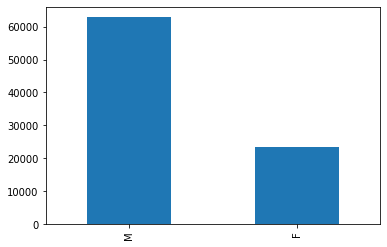

In [ ]:
ri.driver_gender.value_counts().plot(kind='bar')

## Stop Time Most

In [ ]:
ri.stop_time.isnull().sum()

0

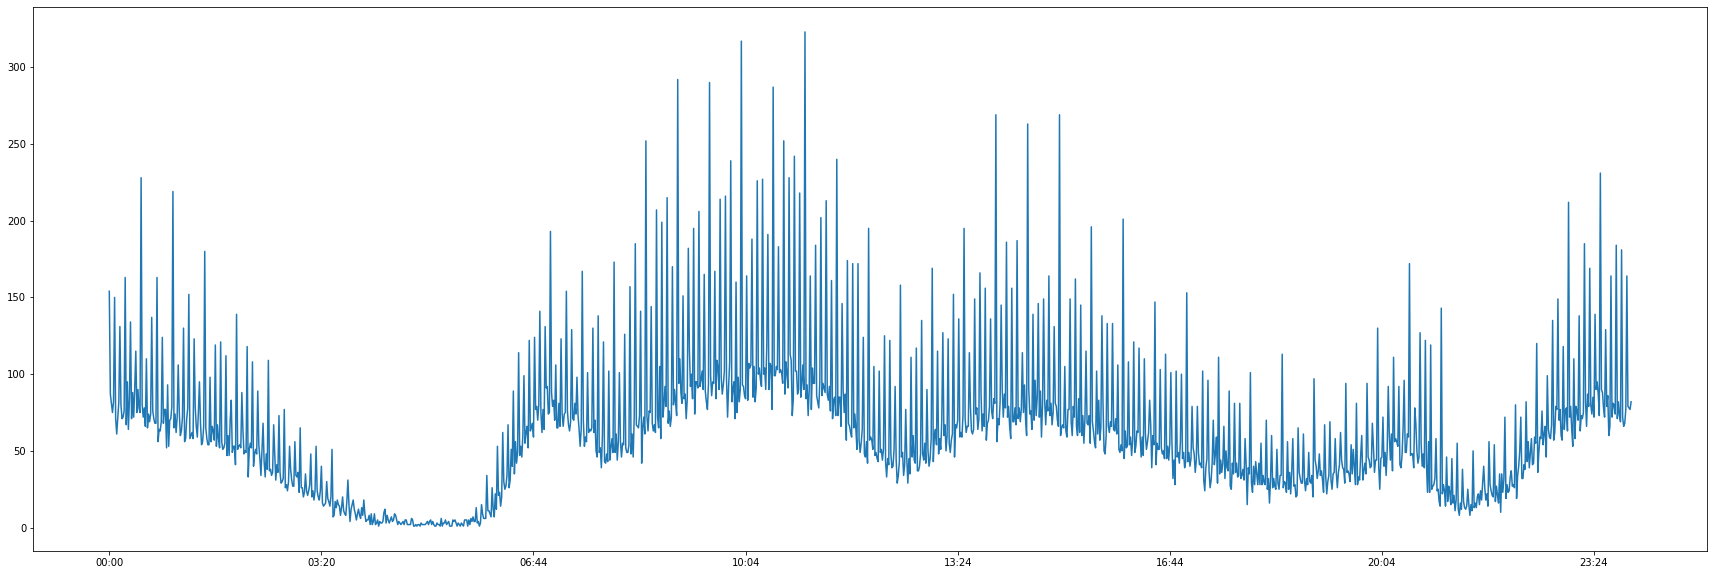

In [ ]:
ri.stop_time.value_counts().sort_index().plot(kind='line', figsize=(30, 10))

In [ ]:
ri.stop_time.value_counts().sort_index(ascending=False).sort_values(ascending=False).head(100)

11:00    323
10:00    317
09:00    292
09:30    290
10:30    287
        ... 
23:25    139
07:45    138
15:40    138
23:10    138
00:40    137
Name: stop_time, Length: 100, dtype: int64

## Male/Female Drug-related stop

In [ ]:
ri.loc[ri.driver_gender=='M'].drugs_related_stop.value_counts(normalize=True)

False    0.988568
True     0.011432
Name: drugs_related_stop, dtype: float64

In [ ]:
ri.loc[ri.driver_gender=='F'].drugs_related_stop.value_counts(normalize=True)

False    0.995917
True     0.004083
Name: drugs_related_stop, dtype: float64

Max Violation type

In [ ]:
ri.violation_raw.value_counts(normalize=True)*100

Speeding                            56.086242
Other Traffic Violation             18.776039
Equipment/Inspection Violation      12.753449
Registration Violation               3.971854
Seatbelt Violation                   3.416350
Special Detail/Directed Patrol       2.841172
Call for Service                     1.502176
Violation of City/Town Ordinance     0.244190
Motorist Assist/Courtesy             0.234932
APB                                  0.091427
Suspicious Person                    0.064809
Warrant                              0.017360
Name: violation_raw, dtype: float64

## Day or night arrest

In [ ]:
ri.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
ri['stop_time'] = pd.to_datetime(ri['stop_time'])

In [ ]:
ri.stop_time

0       2021-09-27 01:55:00
1       2021-09-27 08:15:00
2       2021-09-27 23:15:00
3       2021-09-27 17:15:00
4       2021-09-27 10:00:00
                ...        
91736   2021-09-27 20:27:00
91737   2021-09-27 20:35:00
91738   2021-09-27 20:45:00
91739   2021-09-27 21:42:00
91740   2021-09-27 22:46:00
Name: stop_time, Length: 91741, dtype: datetime64[ns]

In [ ]:
import datetime

In [ ]:
ri['is_day'] = ri["stop_time"].dt.hour.apply(lambda x: True if x>5 and x<=18 else False)

In [ ]:
ri.loc[ri.is_arrested==True].groupby("is_day").is_arrested.value_counts(normalize=True)

is_day  is_arrested
False   True           1.0
True    True           1.0
Name: is_arrested, dtype: float64

In [ ]:
ri.groupby("is_day").is_arrested.value_counts(normalize=True)

is_day  is_arrested
False   False          0.951885
        True           0.048115
True    False          0.973106
        True           0.026894
Name: is_arrested, dtype: float64

In [ ]:
ri.is_arrested.value_counts(normalize=True)

False    0.966103
True     0.033897
Name: is_arrested, dtype: float64

### Race bias in drug and stop

In [ ]:
ri[ri.driver_gender=='M'].drugs_related_stop.value_counts(normalize=True)

False    0.988568
True     0.011432
Name: drugs_related_stop, dtype: float64

In [ ]:
ri[ri.driver_gender=='F'].drugs_related_stop.value_counts(normalize=True)

False    0.995917
True     0.004083
Name: drugs_related_stop, dtype: float64

## Age + Race => Arrested

In [ ]:
ri.driver_race.value_counts()

White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: driver_race, dtype: int64

In [ ]:
ri.new_age

0        20.0
1        40.0
2        33.0
3        19.0
4        21.0
         ... 
91736    29.0
91737    33.0
91738    23.0
91739    22.0
91740    56.0
Name: new_age, Length: 91741, dtype: float64

In [ ]:
def age_category(x):
  start_range = (x%10)*10
  end_range = start_range + 9
  return f"{start_range}-{end_range}"

In [ ]:
ri["age_category"] = ri.new_age.apply(age_category)

In [ ]:
ri[ri.is_arrested==True].groupby('age_category').driver_race.value_counts(normalize=True)

age_category  driver_race
0.0-9.0       White          0.521605
              Black          0.243827
              Hispanic       0.222222
              Asian          0.012346
10.0-19.0     White          0.547231
              Black          0.267101
              Hispanic       0.172638
              Asian          0.013029
20.0-29.0     White          0.518519
              Black          0.271605
              Hispanic       0.197531
              Asian          0.012346
30.0-39.0     White          0.508834
              Black          0.243816
              Hispanic       0.233216
              Asian          0.010601
              Other          0.003534
40.0-49.0     White          0.529210
              Black          0.240550
              Hispanic       0.199313
              Asian          0.027491
              Other          0.003436
50.0-59.0     White          0.606780
              Black          0.216949
              Hispanic       0.169492
              Asian     

In [ ]:
data = ri[ri.is_arrested==True].groupby('age_category').driver_race.value_counts(normalize=True).unstack()

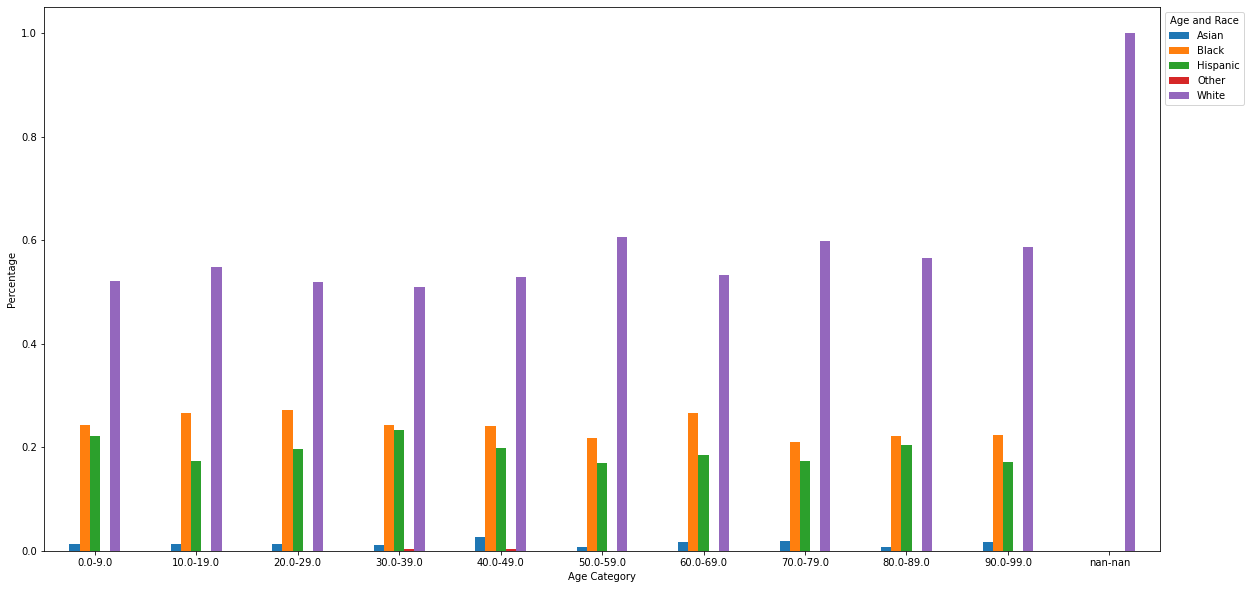

In [ ]:
ax = data.plot(kind='bar', figsize=(20, 10), xlabel='Age Category', ylabel='Percentage', rot=0)
ax.legend(title='Age and Race', bbox_to_anchor=(1, 1), loc='upper left')

## Year wise stops

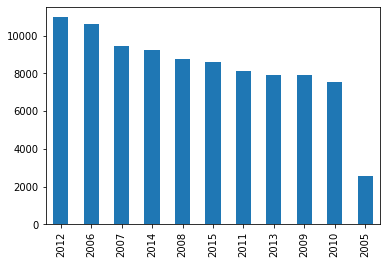

In [ ]:
ri.year.value_counts().plot(kind='bar')